# LDA for Enron Emails

Installing dependencies

In [1]:
import pandas as pd
import nltk
import re
import warnings
from tqdm import tqdm
import random
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from sklearn.model_selection import train_test_split
import pickle
from gensim.models.ldamodel import LdaModel


In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# enron_emails_df=pd.read_csv('./data/filter_50krows.csv')
# enron_emails_df=pd.read_csv('../data/finalv1_data.csv')
enron_emails_df=pd.read_csv('../data/email_with_predicted_roles.csv')
enron_emails_df.head()

,From,To,Subject,X-cc,X-bcc,Content,Job_Title,Total_Sentence_Word_Count,From_Names,To_Names,Cleaned_Content,BoW,DateTime
0,richard.shapiro@enron.com,leslie.lawner@enron.com,Re: Talking points about California Gas market,"Christi L Nicolay, Joe Hartsoe, Rebecca W Cant...",X-Folder: \Phillip_Allen_Dec2000\Notes Folders...,"Leslie,after seeing point # 3 in writing , I w...","Vice President, Regulatory Affairs",133,richard shapiro,leslie lawner,leslieafter seeing point 3 writing extremely r...,"['leslieafter', 'seeing', 'point', '3', 'writi...",12 Dec 2000
1,keith.holst@enron.com,k..allen@enron.com,FW: must see,X-bcc:,"X-Folder: \PALLEN (Non-Privileged)\Allen, Phil...","-----Original Message-----\nFrom: \tMarquez, J...",Director,137,keith holst,k allen,original message marquez jose tuesday october ...,"['original', 'message', 'marquez', 'jose', 'tu...",23 Oct 2001
2,john.lavorato@enron.com,k..allen@enron.com,RE: Chase Backtest,X-bcc:,"X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phil...",no\n\n -----Original Message-----\nFrom: \tAll...,"CEO, Enron America",164,john lavorato,k allen,original message allen phillip k monday decemb...,"['original', 'message', 'allen', 'phillip', 'k...",20 Dec 2001
3,louise.kitchen@enron.com,"wes.colwell@enron.com, georgeanne.hodges@enron...",NETCO,"Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phil...",The New Year has arrived and we really to fina...,"President, Enron Online",375,louise kitchen,"wes colwell, georgeanne hodges, rob milnthorp",new year arrived finalize lot work regards mov...,"['new', 'year', 'arrived', 'finalize', 'lot', ...",31 Dec 2001
4,louise.kitchen@enron.com,"tim.belden@enron.com, f..calger@enron.com, m.....",Re-start/Integration Planning,"Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phil...",We have for the last couple of weeks started t...,"President, Enron Online",238,louise kitchen,"tim belden, f calger, m presto",last couple weeks started compile restartinteg...,"['last', 'couple', 'weeks', 'started', 'compil...",27 Dec 2001


To do:

1. remove words less than 3 letters
2. remove number strings

In [4]:
import ast

# Convert string to list
enron_emails_df["BoW"] = enron_emails_df["BoW"].apply(ast.literal_eval)

enron_emails_df["BoW"].head()

0    [leslieafter, seeing, point, 3, writing, extre...
1    [original, message, marquez, jose, tuesday, oc...
2    [original, message, allen, phillip, k, monday,...
3    [new, year, arrived, finalize, lot, work, rega...
4    [last, couple, weeks, started, compile, restar...
Name: BoW, dtype: object

In [5]:
def clean_bow(bow_list):
    return [word for word in bow_list if len(word) >= 3 and not any(char.isdigit() for char in word)]



In [6]:
enron_emails_df["cleaned_bow"] = enron_emails_df["BoW"].apply(clean_bow)

In [7]:
# Step 2: Split into train and test
train_data, test_data = train_test_split(enron_emails_df["cleaned_bow"], test_size=0.2, random_state=42)

In [8]:
# Step 3: Find best k for LDA using coherence
enron_dictionary = corpora.Dictionary(train_data)
enron_vecs = [enron_dictionary.doc2bow(text) for text in train_data]

# Load & Test LDA Model

In [9]:
enron_lda = LdaModel.load("train_enron_lda_model.gensim")


In [10]:

# Step 5: Evaluate 3 random samples from test data
sample_test_data = random.sample(list(test_data), 3)
for i, doc in enumerate(sample_test_data):
    bow = enron_dictionary.doc2bow(doc)
    topics = enron_lda.get_document_topics(bow)
    print(f"\nSample {i+1}: {doc}")
    print(f"Assigned Topics: {topics}")


Sample 1: ['phillip', 'lovehouect', 'ploveenroncom', 'birthday', 'tree', 'cedar', 'tree', 'comments', 'pretty', 'apply', 'elm', 'tree', 'pretty', 'close', 'huh', 'jimmy', 'get', 'kick', 'since', 'astrology', 'returnpath', 'dcbartlettcharternet', 'received', 'esmtp', 'sun', 'feb', 'received', 'outboundcharternet', 'esmtp', 'sun', 'feb', 'received', 'helo', 'communigate', 'pro', 'smtp', 'smtp', 'sun', 'feb', 'messageid', 'chanda', 'bartlett', 'dcbartlettcharternet', 'tim', 'judge', 'tjudgescottsboroorg', 'randy', 'chandler', 'robb', 'redmmscottsboroorg', 'ashley', 'love', 'amanda', 'justice', 'wendlickscottsboroorg', 'rebecca', 'yayahiwaaynet', 'scotty', 'haynes', 'shayneshiwaaynet', 'teresa', 'scotty', 'holt', 'skholthiwaaynet', 'ssmorrishiwaaynet', 'shayna', 'justice', 'mcduffiehiwaaynet', 'mona', 'hutchins', 'julie', 'murphy', 'murphyjuliayahoocom', 'pat', 'boleware', 'kellie', 'dupree', 'kelliebobhotmailcom', 'rice', 'kimnjpcharternet', 'holly', 'inglis', 'hollyinglishotmailcom', 'h

# Topic Labels with Rationales from LLMs

## Topic 0
Top words: said, power, energy, state, electricity, california, market, gas, prices, stock

🟢 Label Suggestion:
"Energy Market & State-Level Power Issues"

📝 Rationale: Focuses on power, energy, electricity markets, particularly California and state-level utilities, including financial aspects like prices and stocks.

## Topic 1
Top words: market, ferc, california, iso, capacity, transmission, rate, schedule, customers

🟢 Label Suggestion:
"Regulatory & Infrastructure (FERC, ISO, Transmission)"

📝 Rationale: Heavy presence of FERC, ISO, and terminology related to infrastructure (transmission, rates) and regulation.

## Topic 2
Top words: agreement, deal, contract, credit, fax, legal, counterparty, master, isda, gas

🟢 Label Suggestion:
"Energy Trading & Legal Contracts"

📝 Rationale: Strong presence of trading and legal jargon — agreements, ISDA, deals, counterparties.

## Topic 3
Top words: john, david, richard, meeting, database, communications, error, james, michael, scott

🟢 Label Suggestion:
"Internal Communications & Personnel"

📝 Rationale: Primarily names, suggesting internal discussions or emails; also includes terms like "communications", "database", and "error".

## Topic 4
Top words: information, business, risk, management, data, review, project, group, system

🟢 Label Suggestion:
"Corporate Strategy, Risk, & Operations"

📝 Rationale: Business-centric, focusing on operations, management, projects, and risk — sounds like strategic planning or enterprise risk oversight.

## Topic 5
Top words: message, original, know, get, kay, vince, friday, monday, think, want

🟢 Label Suggestion:
"Casual/Internal Email Chatter"

📝 Rationale: Very casual and informal. Lots of small talk and scheduling (e.g., days of the week, “get”, “know”, “let”), first names, and conversational tone.

## Find optimal number of Topics (K)

In [15]:
# Can take a long time to run. In this case we are going to k_max=10.
import datetime
from tqdm import tqdm  # Import tqdm for progress bar
from gensim.models import CoherenceModel

print(datetime.datetime.now())

model_list = []
coherence_values = []
model_topics = []

# Use tqdm to wrap the range for progress tracking
for num_topics in tqdm(range(2, 16, 2), desc="Training LDA Models"):
    enron_lda_x = gensim.models.ldamodel.LdaModel(corpus=enron_vecs, id2word=enron_dictionary, num_topics=num_topics, random_state=123, passes=10, alpha='auto', per_word_topics=True)
    coherencemodel = CoherenceModel(model=enron_lda_x, texts=train_data, dictionary=enron_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(enron_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2025-04-07 08:03:36.052971


Training LDA Models:  14%|█▍        | 1/7 [21:20<2:08:05, 1280.88s/it]

#Topics: 2 Score: 0.48290897532256566


Training LDA Models:  29%|██▊       | 2/7 [54:07<2:20:21, 1684.22s/it]

#Topics: 4 Score: 0.5125038841038889


Training LDA Models:  43%|████▎     | 3/7 [1:30:02<2:06:37, 1899.37s/it]

#Topics: 6 Score: 0.5406657111722049


Training LDA Models:  57%|█████▋    | 4/7 [2:06:48<1:41:00, 2020.28s/it]

#Topics: 8 Score: 0.5344184616837504


Training LDA Models:  71%|███████▏  | 5/7 [2:52:41<1:16:09, 2284.63s/it]

#Topics: 10 Score: 0.5153550600370778


Training LDA Models:  86%|████████▌ | 6/7 [4:27:55<57:30, 3450.40s/it]  

#Topics: 12 Score: 0.5788053644969068


Training LDA Models: 100%|██████████| 7/7 [5:27:55<00:00, 2810.78s/it]

#Topics: 14 Score: 0.5722690911814494
2025-04-07 13:31:31.551806


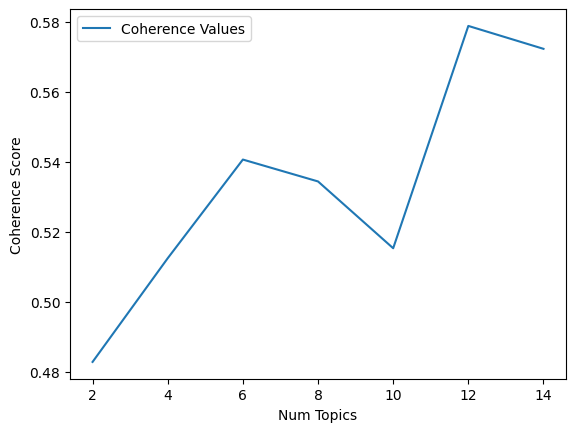

In [16]:
import matplotlib.pyplot as plt

# Use the same range as the loop that generated coherence_values
start = 2
limit = 16
step = 2
x = range(start, limit, step)  # This will match the length of coherence_values

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(["Coherence Values"], loc="best")
plt.show()

## Build the LDA Model

In [17]:
# Number of passes (iterations over the corpus)
num_passes = 10

# Initialize the LDA model
enron_lda = gensim.models.ldamodel.LdaModel(
    corpus=enron_vecs,
    id2word=enron_dictionary,
    num_topics=6,
    passes=1,  # Set passes to 1 for manual looping
    update_every=1,
    per_word_topics=True
)

# Use tqdm to track progress
for i in tqdm(range(num_passes), desc="Training LDA Model"):
    enron_lda.update(enron_vecs)  # Update the model with the corpus

Training LDA Model: 100%|██████████| 10/10 [30:24<00:00, 182.42s/it]


In [5]:
topics = enron_lda.show_topics(6, 30)

for i in range(0,6 ):
    print(topics[i])

(0, '0.014*"said" + 0.013*"power" + 0.010*"energy" + 0.007*"state" + 0.005*"electricity" + 0.005*"california" + 0.005*"new" + 0.005*"gas" + 0.004*"million" + 0.004*"market" + 0.004*"billion" + 0.004*"prices" + 0.003*"companies" + 0.003*"year" + 0.003*"price" + 0.003*"last" + 0.003*"one" + 0.003*"inc" + 0.003*"dow" + 0.003*"jones" + 0.003*"davis" + 0.003*"enrons" + 0.003*"utilities" + 0.003*"percent" + 0.003*"business" + 0.003*"states" + 0.003*"stock" + 0.002*"two" + 0.002*"financial" + 0.002*"news"')
(1, '0.010*"market" + 0.009*"ferc" + 0.009*"california" + 0.008*"final" + 0.006*"power" + 0.006*"capacity" + 0.006*"iso" + 0.005*"schedule" + 0.005*"transmission" + 0.005*"hour" + 0.005*"price" + 0.005*"rate" + 0.005*"jeff" + 0.005*"energy" + 0.005*"customers" + 0.005*"order" + 0.004*"file" + 0.004*"commission" + 0.004*"generation" + 0.004*"gas" + 0.003*"pge" + 0.003*"bill" + 0.003*"load" + 0.003*"comments" + 0.003*"rates" + 0.003*"costs" + 0.003*"variances" + 0.003*"epmi" + 0.003*"utiliti

In [19]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [20]:
# Generate the visuals
visual= gensimvis.prepare(enron_lda, enron_vecs, enron_dictionary)

In [21]:
#Save the output to the html file
pyLDAvis.save_html(visual, "train_enron_topic_viz_6_topics.html")

## Perplexity & Coherence Scores

In [22]:
# Compute Perplexity
perplex= enron_lda.log_perplexity(enron_vecs, total_docs=None) #For LDAModel
  # a measure of how good the model is. lower the better.
print('\nPerplexity for LDAModel: ', perplex)



Perplexity for LDAModel:  -8.80197668614668


In [23]:
# Compute Coherence Score
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=enron_lda, texts=train_data, dictionary=enron_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score LDAModel: ', coherence_lda)


Coherence Score LDAModel:  0.5295519065208484
